# Project 1

## 2. Exploration of the attributes

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

--- 

Loading the dataframe

In [92]:
df = pd.read_csv('data/glass.data', header=None)

# Name columns
df = df.rename(columns={0: 'Id', 1: 'RI', 2: 'Na', 3: 'Mg', 4: 'Al', 5: 'Si', 6: 'K', 7: 'Ca', 8: 'Ba', 9: 'Fe', 10: 'Type'})
# Change type of 'Type' to categorical
df['Type'] = df['Type'].astype('category')
# df['Type'] = df['Type'].cat.rename_categories({ 1: 'building_windows_float_processed',
#                                                 2: 'building_windows_non_float_processed',
#                                                 3: 'vehicle_windows_float_processed',
#                                                 4: 'vehicle_windows_non_float_processed',
#                                                 5: 'containers',
#                                                 6: 'tableware',
#                                                 7: 'headlamps'})
df['Type'] = df['Type'].cat.rename_categories({ 1: 'BW-FP',
                                                2: 'BW-NFP',
                                                3: 'VW-FP',
                                                4: 'VW-NFP',
                                                5: 'containers',
                                                6: 'tableware',
                                                7: 'headlamps'})

# Numerical variables
X = df.drop(columns=['Id', 'Type'])     # dataframe
Xe = X.drop(columns=['RI'])             # only chemical elements

X_np = X.to_numpy()                     # numpy array

# Standardize data
Xc = (X - X.mean(axis=0))               # Centering
Xs = Xc / Xc.std(axis=0, ddof=1)        # Standardization with unbiased estimator (N-1 in denominator)
Xec = (Xe - Xe.mean(axis=0))            # Centering
Xes = Xec / Xec.std(axis=0, ddof=1)     # Standardization with unbiased estimator (N-1 in denominator)

# Categorical variable
y = df['Type']          # dataframe   
y_np = y.to_numpy()     # numpy array  
label_encoder = LabelEncoder()
y_num = label_encoder.fit_transform(y)

print(df.head())

   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe   Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0  BW-FP
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0  BW-FP
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0  BW-FP
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0  BW-FP
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0  BW-FP


---

Missing values? -> *No missing values*  

In [63]:
df.isna().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

---

Summary statistics

In [64]:
# Basic statistics about the numerical variables
print(X.describe())

# Distribution of the target variable (see visualizations below)
print(y.value_counts())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000000    0.000000  
50%   

---

Is standardisation needed? -> *Yes, attributes are on **way** different scales*

In [98]:
print(np.std(X, axis=0))

RI    0.003030
Na    0.814693
Mg    1.439034
Al    0.498102
Si    0.772734
K     0.650666
Ca    1.419824
Ba    0.496056
Fe    0.097211
dtype: float64


---

Frequency of each glass type? FIY, the glass types are:
1. `BW-FP` <-> 'Building Windows Float Processed'
2. `BW-NFP` <-> 'Building Windows Non-Float Processed'
3. `VW-FP` <-> 'Vehicle Window Float Processed'
4. `VW-NFP` <-> 'Vehicle Window Non-Float Processed'
5. `containers` <-> 'Containers'
6. `tableware` <-> 'Tableware'
7. `headlamps` <-> 'Headlamps'

In [65]:
# Make a frequency table of the target variable
type_counts = y.value_counts().sort_index()
type_freq = type_counts / len(y)
freq_table = pd.DataFrame({'Count': type_counts, 'Frequency': type_freq})
print(freq_table)

            Count  Frequency
Type                        
BW-FP          70   0.327103
BW-NFP         76   0.355140
VW-FP          17   0.079439
containers     13   0.060748
tableware       9   0.042056
headlamps      29   0.135514


## 3. Data visualizations

### Extreme values and outliers

#### Boxplots of oxides

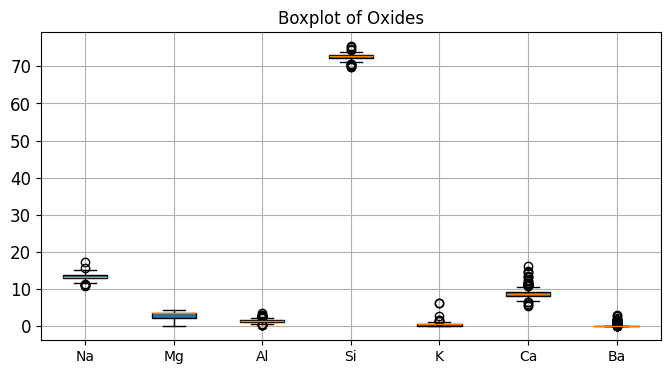

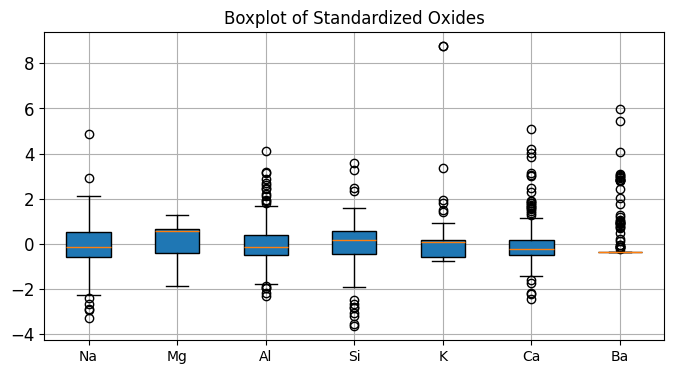

In [67]:
# Unstandardized
fig = plt.figure(figsize=(8, 4))
plt.title("Boxplot of Oxides")
plt.boxplot(df.iloc[:, 2:9], vert=True, patch_artist=True, tick_labels=df.columns[2:9]) # patch_artist=True zorgt voor kleur: "A patch is a 2D artist with a face color and an edge color."
plt.yticks(fontsize=12)
plt.grid()
plt.savefig("figures/boxplot_oxides.pdf")
plt.show()

# Standardized
fig = plt.figure(figsize=(8, 4))
plt.title("Boxplot of Standardized Oxides")
plt.boxplot(Xs.iloc[:, 1:8], vert=True, patch_artist=True, tick_labels=df.columns[2:9]) # patch_artist=True zorgt voor kleur: "A patch is a 2D artist with a face color and an edge color."
plt.yticks(fontsize=12)
plt.grid()
plt.savefig("figures/boxplot_standardized_oxides.pdf")
plt.show()

<b color="red">TODO: outliers?<b>

#### Boxplot of refractive index (RI)

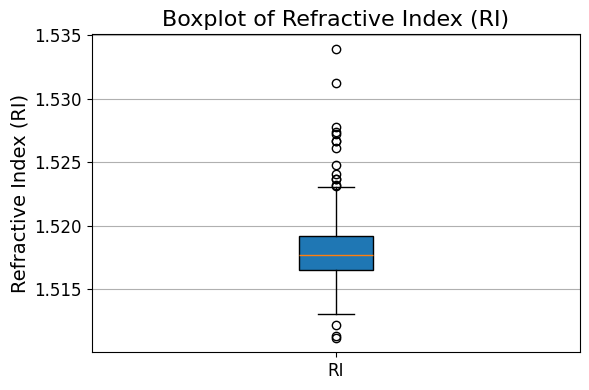

<Figure size 640x480 with 0 Axes>

In [68]:
fig = plt.figure(figsize=(6, 4))
plt.title("Boxplot of Refractive Index (RI)", fontsize=16)
plt.boxplot(df['RI'], vert=True, patch_artist=True) # patch_artist=True zorgt voor kleur: "A patch is a 2D artist with a face color and an edge color."
plt.ylabel("Refractive Index (RI)", fontsize=14)
plt.xticks([1], ['RI'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig("figures/boxplot_RI.pdf")

### Distribution of the attributes

#### Histograms

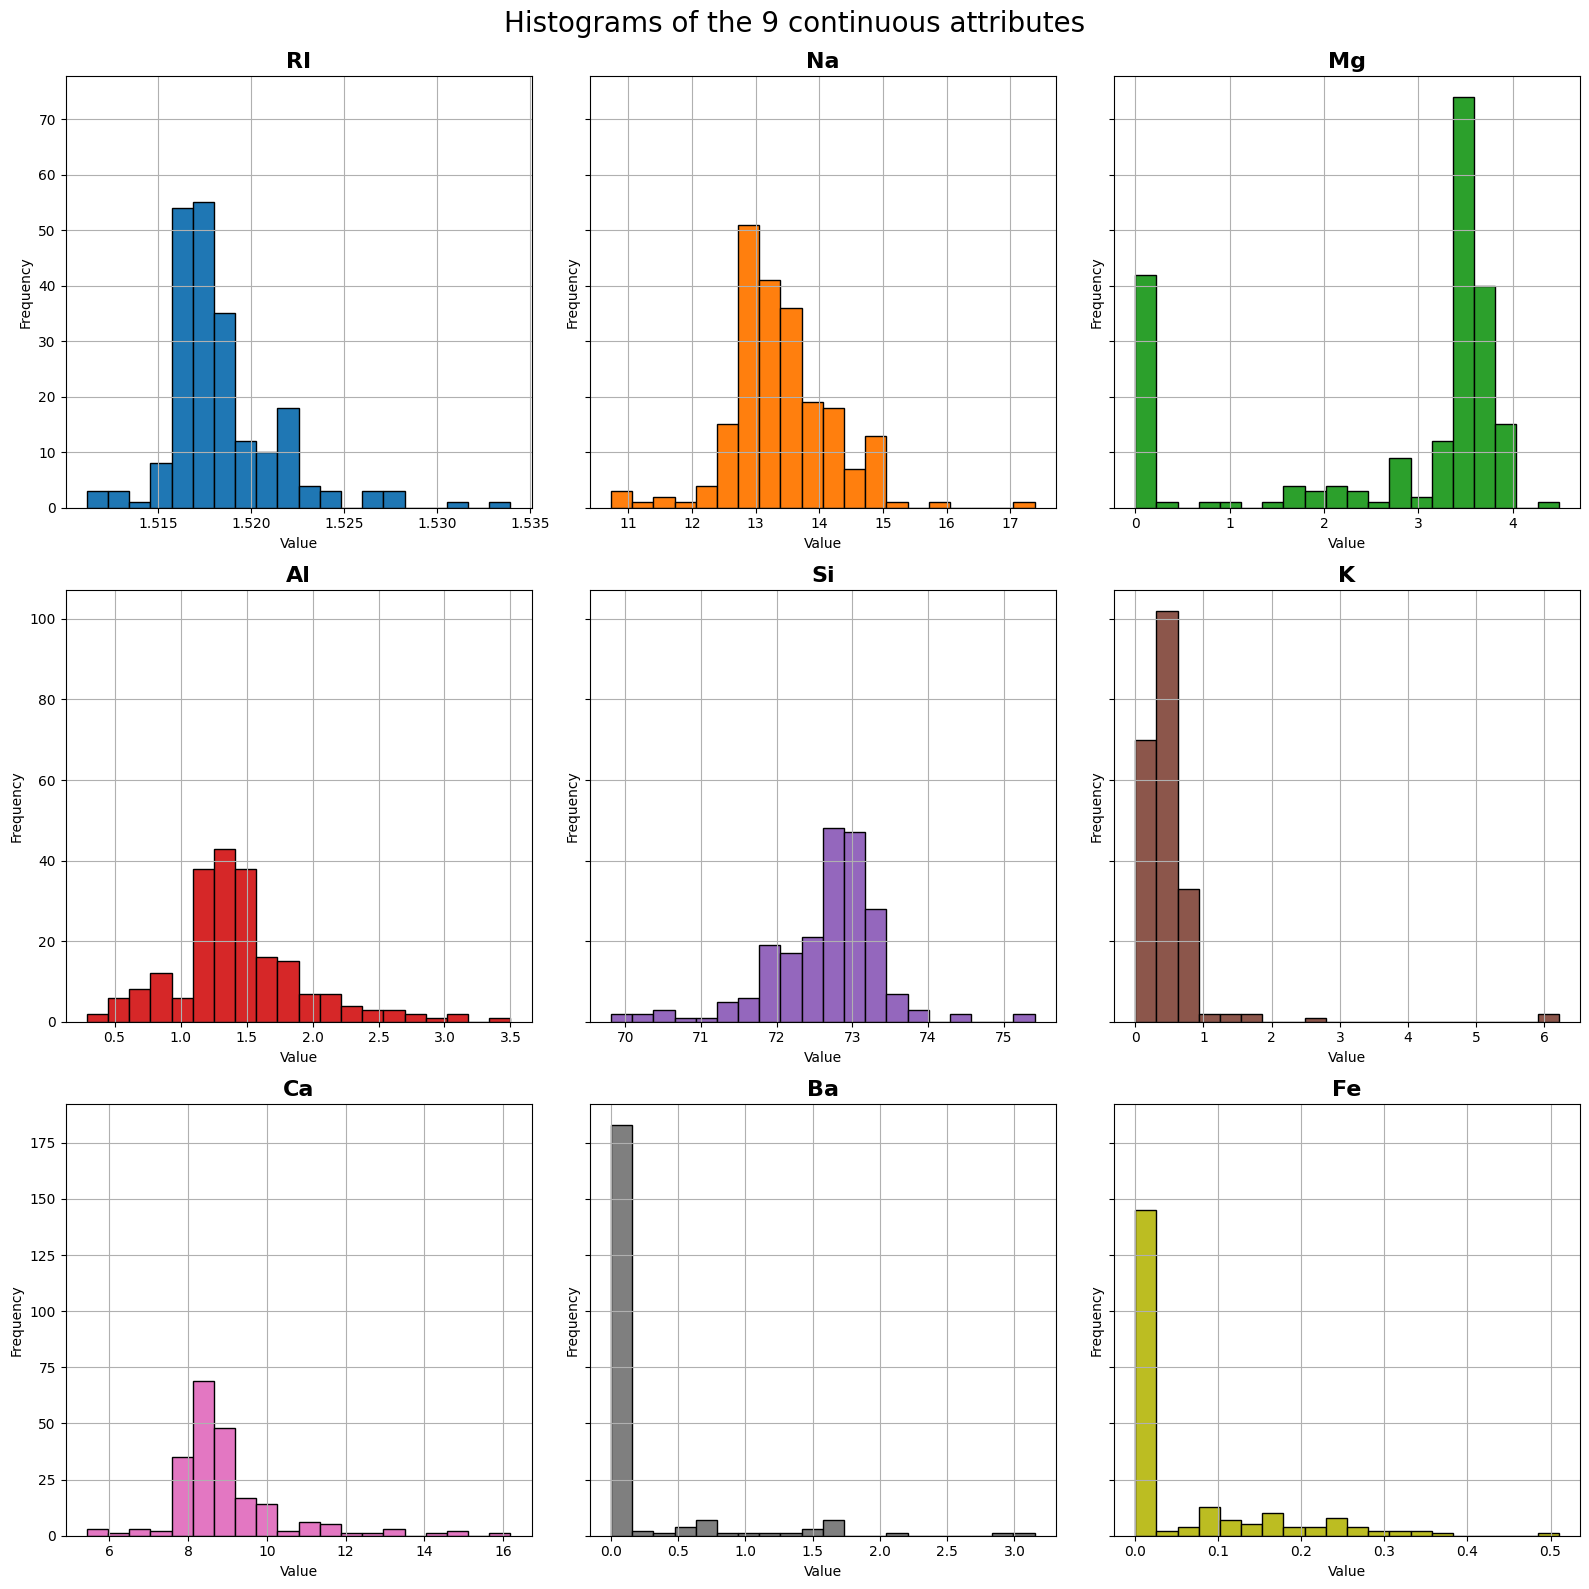

In [69]:
fig, axs = plt.subplots(3, 3, figsize=(16, 16), sharey="row", sharex=None) # share y- (sharey) or x-axis (sharex) (True/'all', False/'none', 'row', 'col')
fig.suptitle("Histograms of the 9 continuous attributes", fontsize=20, y=0.99)

for j in range(9):
    ax = axs[j // 3, j % 3]
    ax.hist(df.iloc[:, j+1], color=f"C{j}", bins=20, edgecolor='black') 
    # -> f"C{j}" is a nice way to get different colors
    # -> a bin is an interval
    # -> dividing the values into bins (of equal size) is called 'binning'
    # -> don't forget edgecolor
    ax.grid()
    ax.set_title(df.columns[j+1], fontsize=16, fontweight='bold')
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.savefig("figures/histograms_chemical_elements.pdf")
plt.show()

#### Distribution of the type

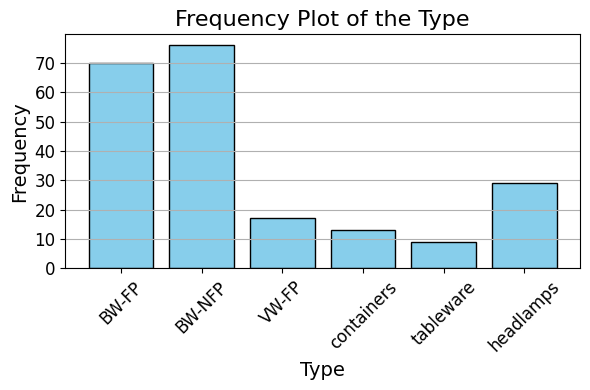

In [70]:
# Make a frequency plot of the target variable
fig = plt.figure(figsize=(6, 4))
plt.title("Frequency Plot of the Type", fontsize=16)
plt.bar(y.cat.codes.unique(), type_counts, color="skyblue", edgecolor='black')
plt.xlabel("Type", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Rename x ticks
# so that the class names are converted to numbers
# plt.xticks(ticks=range(len(y_df.cat.codes.unique())), labels=y_df.cat.codes.unique(), fontsize=12)

plt.xticks(ticks=range(len(y.cat.categories)), labels=y.cat.categories, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("figures/frequency_plot_type.pdf")
plt.show()

### Correlation between attributes

#### Correlations

          RI        Na        Mg        Al        Si         K        Ca  \
RI  1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K  -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca  0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe  0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   

          Ba        Fe  
RI -0.000386  0.143010  
Na  0.326603 -0.241346  
Mg -0.492262  0.083060  
Al  0.479404 -0.074402  
Si -0.102151 -0.094201  
K  -0.042618 -0.007719  
Ca -0.112841  0.124968  
Ba  1.000000 -0.058692  
Fe -0.058692  

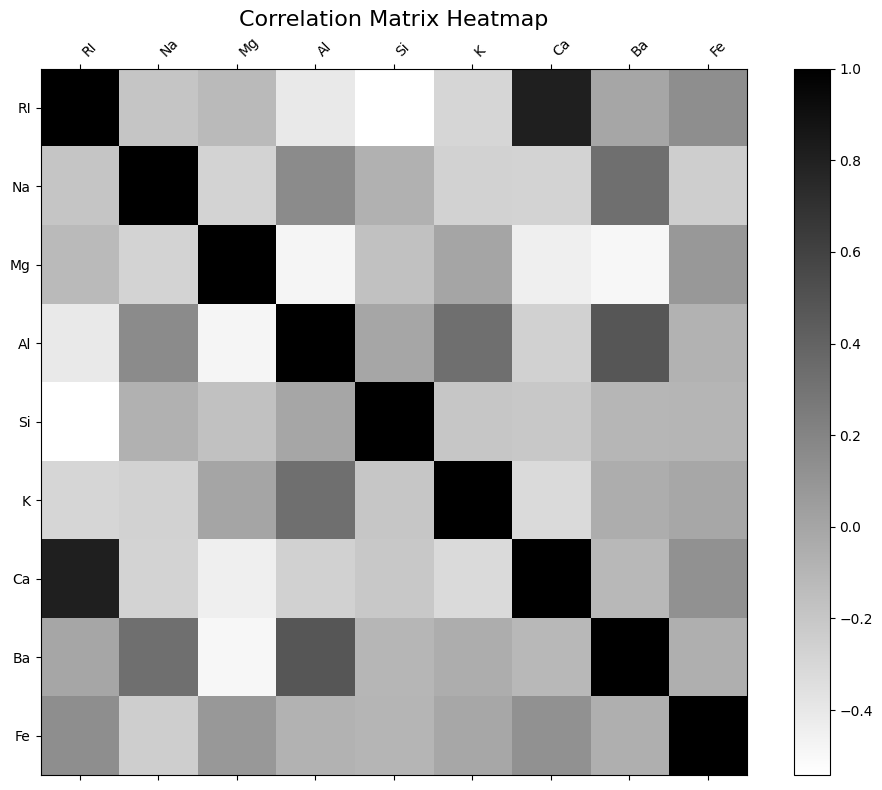

In [99]:
# Correlation (standardized covariance) matrix
corr_matrix = X.corr()
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='gray_r')
fig.colorbar(cax)
ticks = np.arange(0, len(X_df.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(X.columns, rotation=45, ha='left')
ax.set_yticklabels(X.columns)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()
plt.savefig("figures/correlation_matrix.pdf")
plt.show()

#### Individual correlations

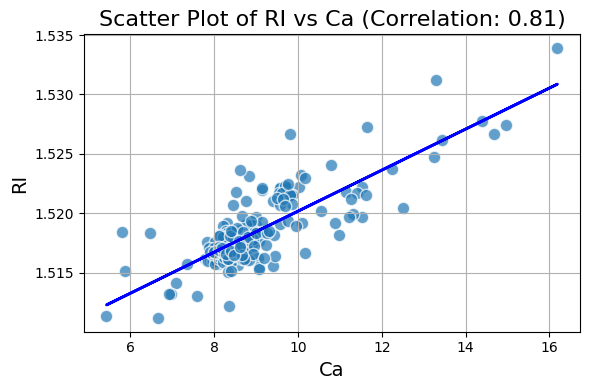

In [100]:
def correlation_plot(x, y, x_label, y_label, filename, save=False):
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, alpha=0.7, edgecolors='w', s=80)
    # Add a regression line
    slope, intercept = np.polyfit(x, y, 1)
    plt.plot(x, slope*x + intercept, color='blue', linewidth=2)
    plt.title(f'Scatter Plot of {y_label} vs {x_label} (Correlation: {corr_matrix.loc[attr1, attr2]:.2f})', fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.grid()
    plt.tight_layout()
    if save:
        plt.savefig(f'figures/{filename}.pdf')   
    plt.show()

attr1 = 'Ca'
attr2 = 'RI'
correlation_plot(X[attr1], X[attr2], attr1, attr2, f'scatter_{attr2}_vs_{attr1}', True)

#### Mix scatter plots

(not useful)

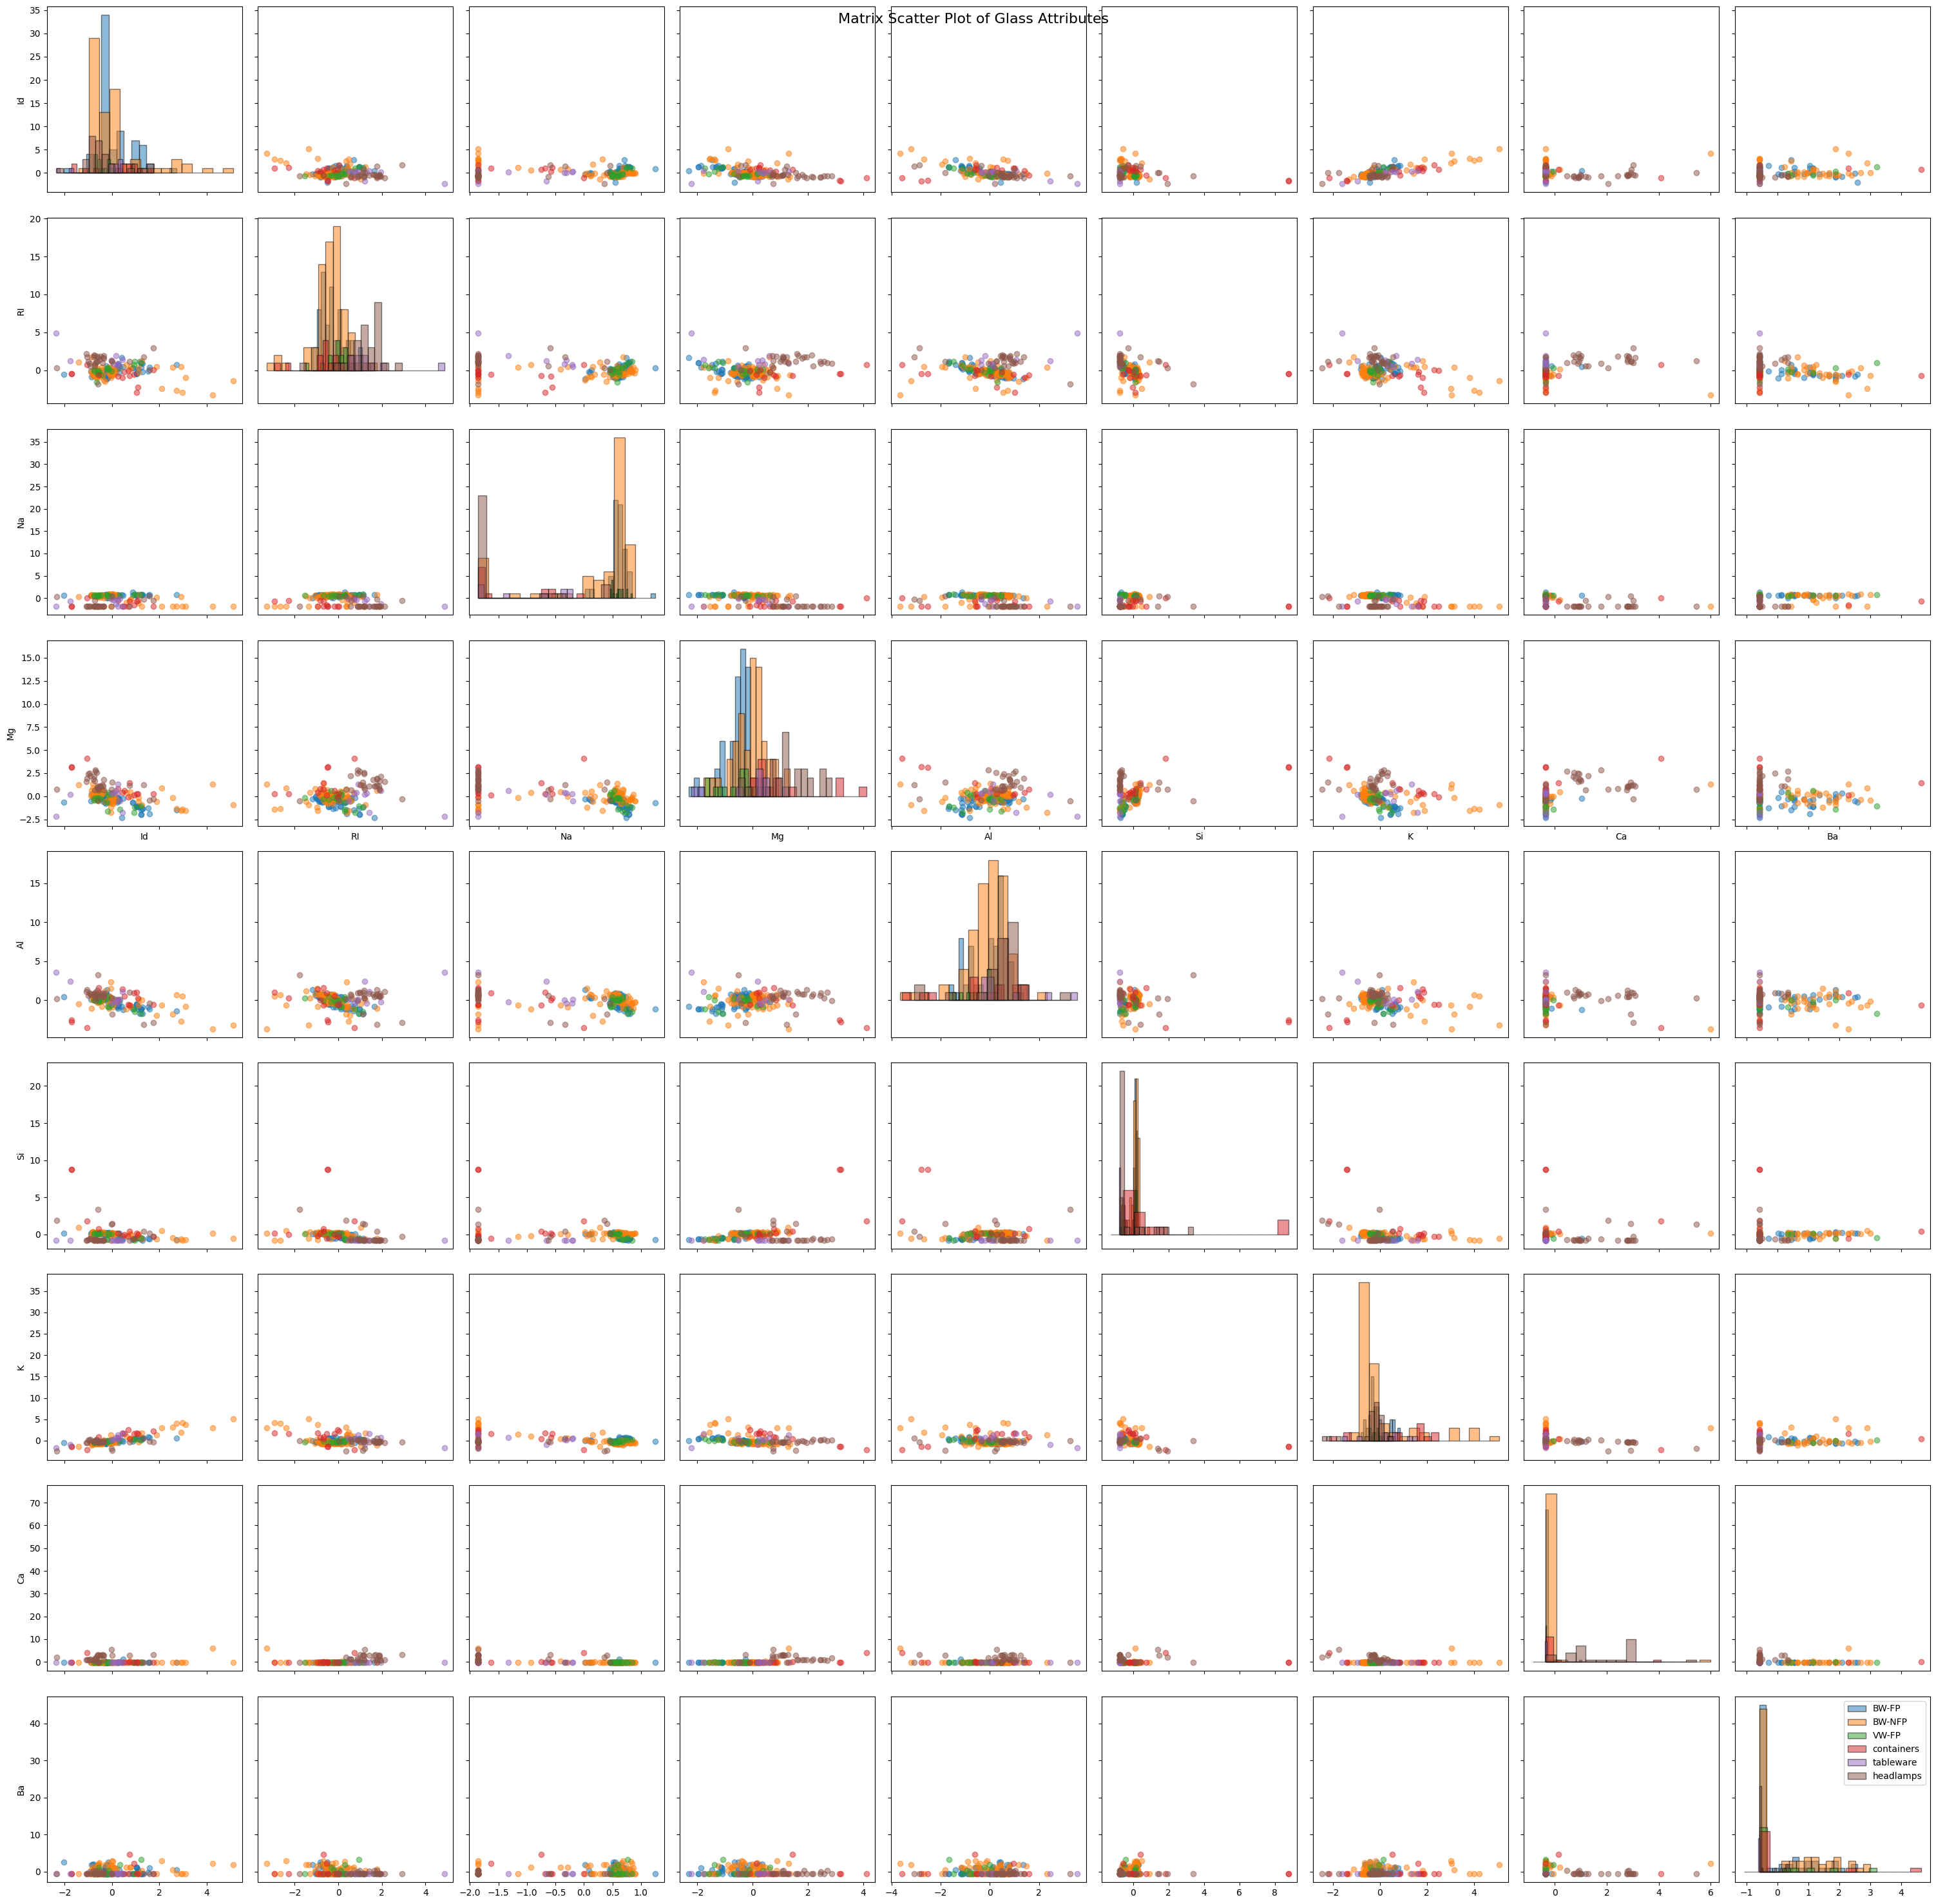

In [46]:
fig, axs = plt.subplots(9, 9, figsize=(30, 30), sharex='col', sharey='row')

list_of_types = df["Type"].unique() # get unique glass types

fig.suptitle("Matrix Scatter Plot of Glass Attributes", fontsize=16) # overall title

# Loop over i (rows) and j (columns)
for i in range(9):
    for j in range(9):

        # loop through each type
        for (type_index, type) in enumerate(list_of_types): 

            # Filter the dataframe for the current type
            subset = df.query(f'Type == "{type}"')

            # Standardized values
            subset = (subset.iloc[:, 1:10] - X.mean(axis=0)) / X.std(axis=0, ddof=1)

            if i == j:
                # Plot the histogram on the diagonal
                axs[i, j].hist(
                    subset.iloc[:, j], # values for the $j$'th attribute
                    label=type, alpha=0.5, color=f"C{type_index}", bins=15, edgecolor='black'
                )
            
            else:
                # Plot the scatter plot for attribute pair (if not on the diagonal)
                axs[i, j].scatter(
                    x=subset.iloc[:, j],        # x-values for the $j$'th attribute
                    y=subset.iloc[:, i],        # y-values for the $i$'th attribute
                    label=type, alpha=0.5
                )

        if j == 0: # Set the y-label for the first column!!
            axs[i, j].set_ylabel(df.columns[i])
        if i == 3: # Set the x-label for the last row!!
            axs[i, j].set_xlabel(df.columns[j])

# Add the legend to the last subplot only!!
axs[8, 8].legend(loc='upper right')
plt.tight_layout()
plt.show()

## 4. Principal Component Analysis (PCA)

**!! Will we do PCA on all 9 numerical attributes or only on the oxides? !!**

- All numerical attributes: 
    -   Use `Xm` for the centered dataframe
    -   Use `Xs` for the standardized dataframe
- Only oxides:
    -   Use `Xem` for the centered dataframe
    -   Use `Xes` for the standardized dataframe

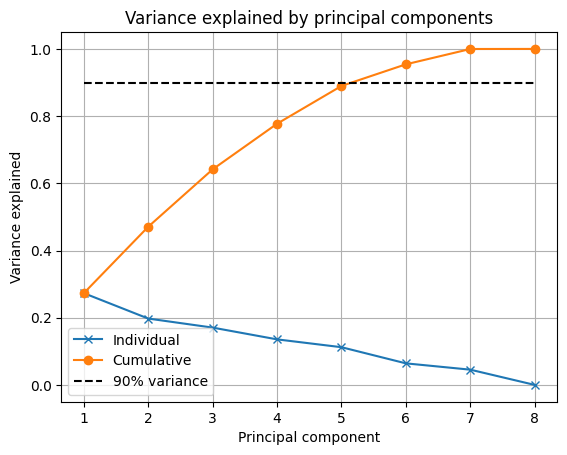

In [ ]:
# Create PCA object
pca = PCA()

## Fit PCA to the (centered) data
## This centering is done automatically by sklearn PCA!
# pca.fit(X)

# Fit PCA to the standardized data
pca.fit(Xes)

# Get principal components
Vt = pca.components_    # each row is a principal component
V = Vt.T                # each column is a principal component

# Explained variances per component
rho = pca.explained_variance_ratio_

# 90% threshold for variance explained
threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", f"{threshold*100:.0f}% variance"])
plt.grid()
plt.show()

In [94]:
# Project X to the subspace
B = pca.transform(Xes) # B = (Xs @ V).to_numpy()

# Withheld number of components
M = 5

# Print the rotations
print("Rotations (Principal Axes):")
for i in range(M):
    print(f"PC {i+1}: {V[:, i]}")

Rotations (Principal Axes):
PC 1: [ 0.37840266 -0.49734843  0.52120149  0.02189015  0.06315266 -0.10713827
  0.53648121 -0.18451784]
PC 2: [ 0.03593813 -0.4018974  -0.23024259  0.0154208  -0.53880408  0.69198612
  0.06259528  0.10423377]
PC 3: [-0.47711085 -0.19222531  0.26350271 -0.39096539  0.48863986  0.3227271
  0.06531347  0.40735674]
PC 4: [-0.41768157 -0.26734983  0.16359681  0.82927746  0.10487427  0.00317247
 -0.16695209 -0.02682316]
PC 5: [ 0.10371558  0.12181725  0.05628556  0.19298642 -0.2766782  -0.28521853
  0.2439764   0.84650275]


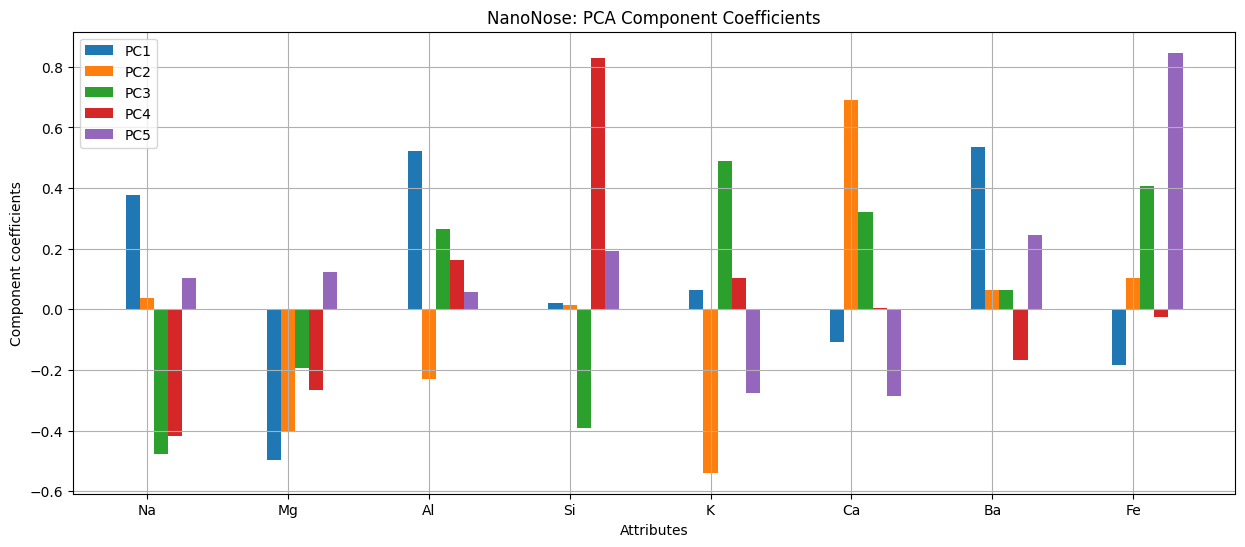

In [95]:
bw = 0.1 # bar width
r = np.arange(1, Xes.shape[1] + 1) # the x locations for the groups

fig = plt.figure(figsize=(15, 6))
plt.title("NanoNose: PCA Component Coefficients")
for i, pc in enumerate(V[:, :M].T):
    plt.bar(r + i * bw, pc, width=bw, label=f"PC{i+1}")
plt.xticks(r + bw, Xes.columns)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend()
plt.grid()
plt.show()

Plot attribute coefficients in principal component space

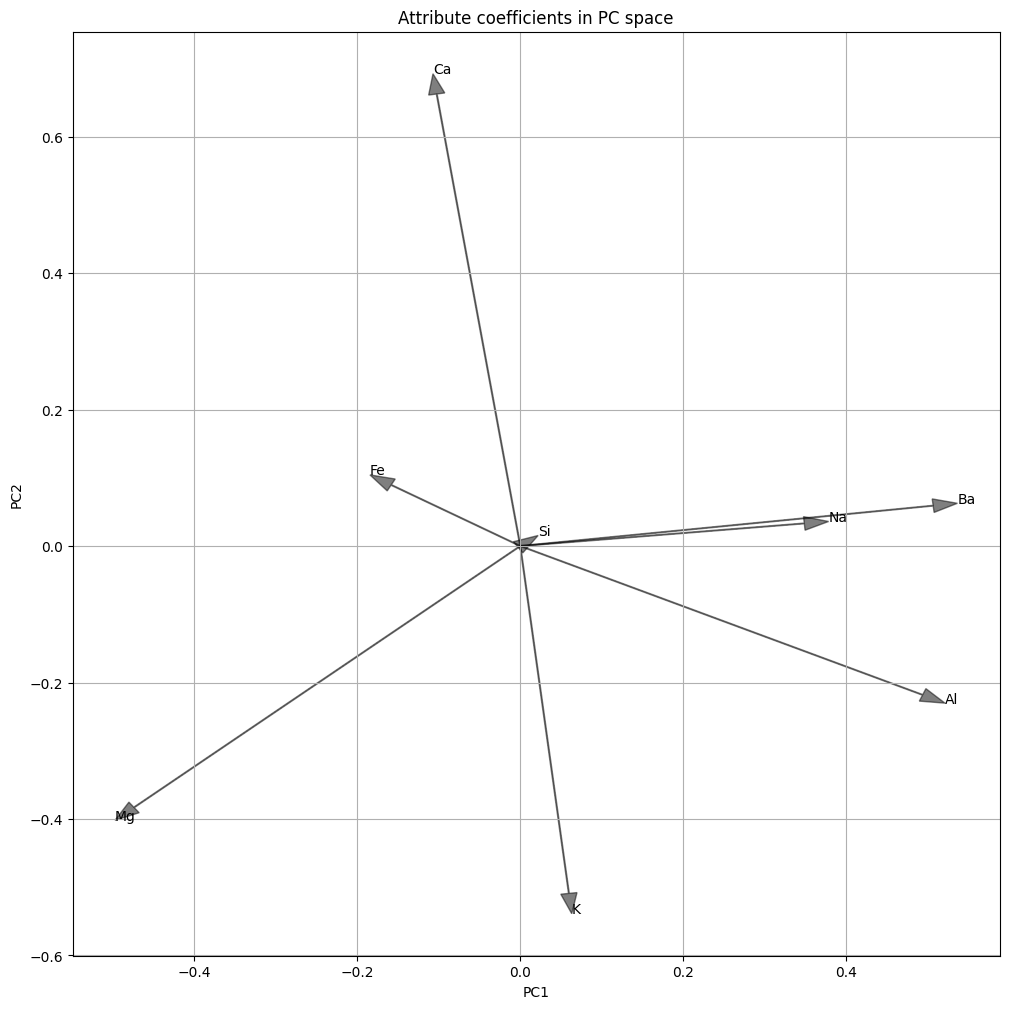

In [97]:
indices = (0, 1) # which principal components to plot   

fig = plt.figure(figsize=(10, 10))
plt.title("Attribute coefficients in PC space")

for attr_idx, attr_name in enumerate(Xes.columns):
    # Plot an arrow for each attribute, add a label
    plt.arrow(0, 0, V[attr_idx, indices[0]], V[attr_idx, indices[1]], color='black', alpha=0.5, head_width=0.02, length_includes_head=True)
    plt.text(V[attr_idx, indices[0]], V[attr_idx, indices[1]], attr_name)

plt.grid()
plt.tight_layout()
plt.xlabel(f"PC{indices[0]+1}")
plt.ylabel(f"PC{indices[1]+1}")
plt.show()